**Regression with Regularisation of House Prices**

**Importing libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import metrics
from scipy import stats

In [2]:
import os

**Reading the data**

In [3]:
#importing the dataset without outliers to fit multiple linear Regression
dataset = pd.read_csv('House_price.csv')


In [4]:
dataset.head()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
dataset = dataset.drop(labels = 'Address', axis = 1)

In [6]:
z = np.abs(stats.zscore(dataset))
dataset = dataset[(z < 3).all(axis=1)]
dataset.head()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

**Split the data in Train / split data sets**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
# trying to fit multiple linear regression onto the given dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis = 1))

[[1183835.92 1326946.73]
 [1113271.56 1283208.83]
 [1535400.05 1556256.44]
 ...
 [1841464.67 1856782.78]
 [ 964894.15  954746.58]
 [1444100.96 1316180.49]]


**Finding intercept and coefficient**

In [11]:
print(regressor.coef_)
print(regressor.intercept_)

[2.15e+01 1.66e+05 1.21e+05 2.61e+03 1.50e+01]
-2636110.8768650675


**Calculating errors**

In [12]:
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.9182190345453816
mean_absolute_error : 82495.78852949303
mean_squared_error :  10512740400.121824
root_mean_squared_error :  102531.65560021854


In [13]:
print("Train Accuracy:",regressor.score(X_train, y_train))

Train Accuracy: 0.9141341043543014


**Visualisation**

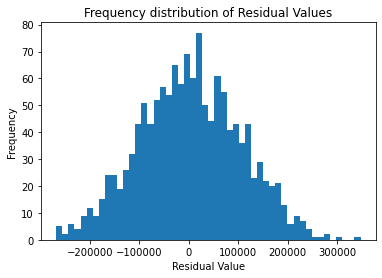

In [14]:
y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)
residual = y_test - y_pred
# to check distribution of residual values
plt.hist(residual, bins = 50)
plt.title('Frequency distribution of Residual Values')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

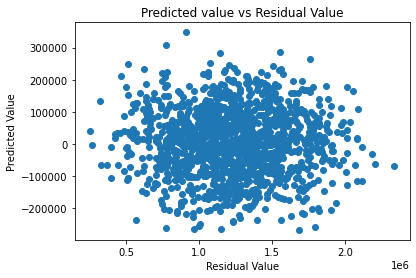

In [15]:
# to check Homoscedasticity assumption of linear regression
plt.scatter(y_pred, residual)
plt.title('Predicted value vs Residual Value')
plt.ylabel('Predicted Value')
plt.xlabel('Residual Value')
plt.show()

In [16]:
#from EDA we observed the the No of Bedrooms and the No of Rooms were has a correlation coefficient of 0.46
#so we trying fitting multiple linear regression by dropping No of Bedrooms
dataset1 = dataset.drop(labels = 'Number of Bedrooms', axis = 1)

In [17]:
dataset1.head()

,Avg. Area Income,House Age,Number of Rooms,Area Population,Price
0,79545.45857,5.682861,7.009188,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,26354.10947,6.309435e+05


In [18]:
X = dataset1.iloc[:, :-1].values
y = dataset1.iloc[:, -1].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Fitting the model**

In [20]:
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = regressor1.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis = 1))

[[1187257.03 1326946.73]
 [1114231.71 1283208.83]
 [1540176.12 1556256.44]
 ...
 [1839909.68 1856782.78]
 [ 968155.79  954746.58]
 [1446461.38 1316180.49]]


**Finding intercept and coefficient**

In [22]:
print(regressor1.coef_)
print(regressor1.intercept_)

[2.15e+01 1.66e+05 1.22e+05 1.50e+01]
-2637124.0279814573


**Calculating the Errors**

In [23]:
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.9182932561003762
mean_absolute_error : 82421.16449808243
mean_squared_error :  10503199403.198957
root_mean_squared_error :  102485.11795962845


In [24]:
print("Train Accuracy:",regressor1.score(X_train, y_train))

Train Accuracy: 0.9140665168676003


**Visualization data**

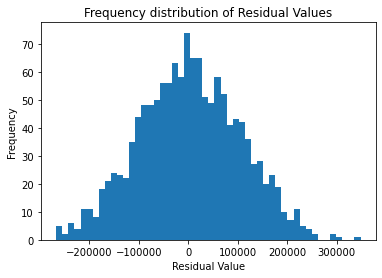

In [25]:
y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)
residual = y_test - y_pred
# to check distribution of residual values
plt.hist(residual, bins = 50)
plt.title('Frequency distribution of Residual Values')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

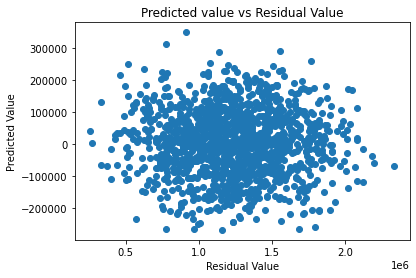

In [26]:
# to check Homoscedasticity assumption of linear regression
plt.scatter(y_pred, residual)
plt.title('Predicted value vs Residual Value')
plt.ylabel('Predicted Value')
plt.xlabel('Residual Value')
plt.show()

In [27]:
# Fitting the data with Regularisation Techniques
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**Ridge Regression**

In [29]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0.01, normalize=True)
ridgereg.fit(X_train, y_train)

Ridge(alpha=0.01, normalize=True)

In [30]:
y_pred = ridgereg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis = 1))

[[1183554.07 1326946.73]
 [1114273.75 1283208.83]
 [1531181.33 1556256.44]
 ...
 [1835541.45 1856782.78]
 [ 966854.65  954746.58]
 [1441125.56 1316180.49]]


In [31]:
print("Coeffients:", ridgereg.coef_)
print("Intercept:", ridgereg.intercept_)

Coeffients: [2.13e+01 1.65e+05 1.19e+05 3.23e+03 1.48e+01]
Intercept: -2595589.6751972344


**Calculating the Errors**

In [32]:
print("R-Square Value : ",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value :  0.9180577310310647
mean_absolute_error : 82624.10303345336
mean_squared_error :  10533475567.067019
root_mean_squared_error :  102632.7217171357


In [33]:
print("Train Accuracy:",ridgereg.score(X_train, y_train))

Train Accuracy: 0.9140313214287424


**Visualization**

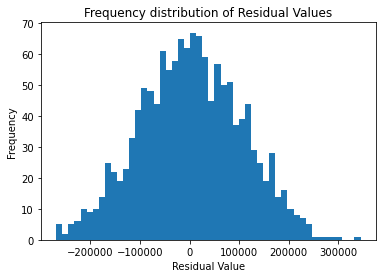

In [34]:
y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)
residual = y_test - y_pred
# to check distribution of residual values
plt.hist(residual, bins = 50)
plt.title('Frequency distribution of Residual Values')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

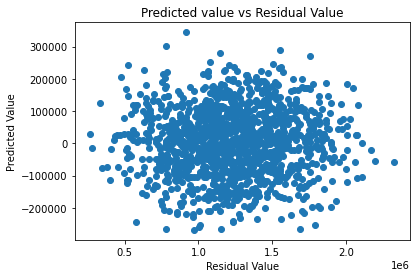

In [35]:
# to check Homoscedasticity assumption of linear regression
plt.scatter(y_pred, residual)
plt.title('Predicted value vs Residual Value')
plt.ylabel('Predicted Value')
plt.xlabel('Residual Value')
plt.show()

**Lasso Regression**

In [36]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.1, normalize=True)
lassoreg.fit(X_train, y_train)

Lasso(alpha=0.1, normalize=True)

In [37]:
y_pred = lassoreg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis = 1))

[[1183844.78 1326946.73]
 [1113276.25 1283208.83]
 [1535402.97 1556256.44]
 ...
 [1841445.7  1856782.78]
 [ 964908.62  954746.58]
 [1444092.28 1316180.49]]


**Getting Coefficient and Intercept**

In [38]:
print("Coeffients:", lassoreg.coef_)
print("Intercept:", lassoreg.intercept_)

Coeffients: [2.15e+01 1.66e+05 1.21e+05 2.60e+03 1.50e+01]
Intercept: -2635999.299565254


In [39]:
print("R-Square Value : ",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value :  0.9182192186447993
mean_absolute_error : 82495.74128678702
mean_squared_error :  10512716734.597992
root_mean_squared_error :  102531.54019421533


In [40]:
print("Train Accuracy:",lassoreg.score(X_train, y_train))

Train Accuracy: 0.9141341033156721


**Visualizing Lasso**

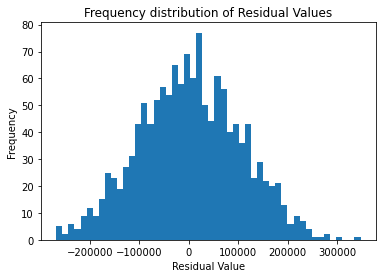

In [41]:
y_pred = y_pred.reshape(len(y_pred),1)
y_test = y_test.reshape(len(y_test),1)
residual = y_test - y_pred
# to check distribution of residual values
plt.hist(residual, bins = 50)
plt.title('Frequency distribution of Residual Values')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

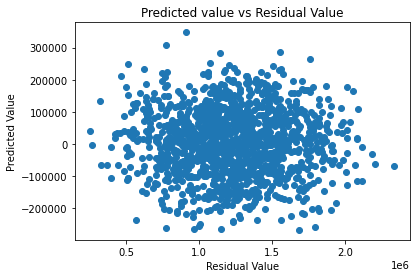

In [42]:
# to check Homoscedasticity assumption of linear regression
plt.scatter(y_pred, residual)
plt.title('Predicted value vs Residual Value')
plt.ylabel('Predicted Value')
plt.xlabel('Residual Value')
plt.show()